# Simple Regression with Gradient Descent from Scratch

### Contents: 
1. Visualizing the Dataset
2. Defining the Hyperparameters
3. Training the Model

In [51]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
sns.set()
from sklearn import datasets
import matplotlib.pyplot as plt

----
## 1. Visualizing the Dataset
I'll make a randomly generated set of points that trend along a line and try to fit that line with gradient descent. 

(150, 2)

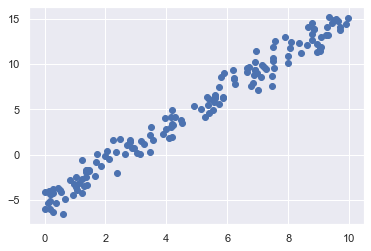

In [113]:
rng = np.random.RandomState(1)
# create x random x values
# creates an array of given shape (150) with standard uniform distribution
x = 10 * rng.rand(150) 
y = 2 * x - 5 + rng.randn(150)
plt.scatter(x, y)
x = np.array(x).reshape(len(x), 1)
y = np.array(y).reshape(len(y), 1)
points = np.hstack([x, y])
points.shape

----
## 2. Defining the Hyperparameters

#### 2.1 Learning rate and Convergence
We're going to have a bunch of hyperparameters for gradient descent. One we'll use is the **learning rate**.
* Learning rate : describes how fast the model converges.
* Convergence: when the model becomes optimal

Convergence, in this case, refers to reaching the line of best fit. You might be wondering, "Shouldn't the learning rate just be super high so that the model can converge faster?" No, there's a tradeoff faced for almost all hyper-parameters. If the learning rate is too small, we'll get slow convergence, but if the learning rate is too high, then the error function might not decrease and  we won't see convergence at all.

#### 2.2 Initial values
The next two hyperparameters we'll use are the initial b, `b_init`, and initial m, `m_init`. These refer to initial values for the parameters in $y=mx+b$. We'll also need to specify the number of iterations, `n_iters`.



## 3. Training the Model
Training the model involves finding the line that minimizes error. 
$$\text{Total Error}  = \frac{1}{N}\sum\limits_{i=1}^{N}((y_i - \hat{y}_i))^2$$

In [70]:
def compute_error(b, m, points):
    # initialize error
    E_tot = 0
    N = len(points)
    # for every point
    for i in range(0, N):
        # get the x value
        x = points[i, 0]
        # get the y value
        y = points[i, 1]
        # calculate square difference for the error and add it to E_tot
        y_hat = m * x + b
        E_tot += (y - yhat) ** 2
    # return it normalized
    return E_tot / float(N)

What is gradient descent?

In [76]:
def gradient_descent(points, b_in, m_in, lrate, n_iters):
    # input b and m into the function
    b = b_in
    m = m_in
    
    # gradient descent
    for i in range(n_iters):
        # update b and m with a more accurate b and m
        # this is a gradient step
        b, m = gradient_step(b, m, points, lrate)
    return b, m

$$ \frac{\partial }{\partial m} E_{tot} = \frac{2}{N} \sum\limits_{i=1}^N -x_i (y_i-\hat{y}_i)$$

$$ \frac{\partial}{\partial b} E_{tot} = \frac{2}{N} \sum\limits_{i=1}^N - (y_i-\hat{y}_i)$$

In [84]:
def gradient_step(b_current, m_current, points, lrate):
    # initalize gradients
    b_gradient = 0
    m_gradient = 0
    
    # When the error is the smallest, that gives us convergence
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # compute partial derivatives for error function
        y_hat = m_current * x + b_current
        m_gradient += -(2/N) * x *(y - y_hat)
        b_gradient += -(2/N) * (y - y_hat)
    
    # update b and m values using the partial derivatives
    m_new = m_current - (lrate * m_gradient)
    b_new = b_current - (lrate * b_gradient)
    return b_new, m_new

default settings: 


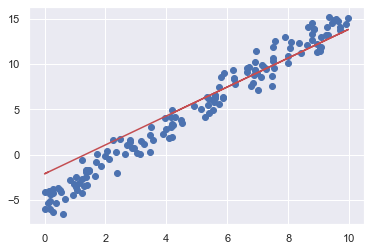

In [110]:
def run(lrate=0.001, n_iters=1000, b_init=0, m_init=0):
    b, m = gradient_descent(points, b_init, m_init, lrate, n_iters)
    y_hat = m * x + b
    plt.scatter(x, y)
    plt.plot(x, y_hat, color='r')

print('default settings: ')
run()

higher lrate:


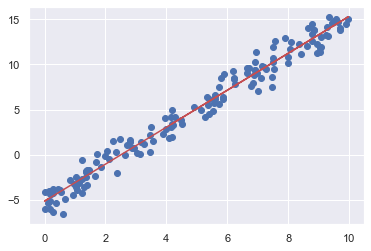

In [112]:
print('higher lrate:')
run(0.01)

Is there a way to figure out an optimal learning rate for this model?

----- Boston 


Model/Approximation:
$$y = X\beta+ \epsilon,$$
where $y$ is the predicted value, <br>
$X$ is the design matrix, <br>
$\beta$ is the coefficient matrix, <br>
and $\epsilon$ is the residual (or error).

In [40]:
boston = datasets.load_boston()
print(type(boston), '\n')

<class 'sklearn.utils.Bunch'> 



In [41]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
boston.feature_names 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [43]:
boston.data.shape

(506, 13)

In [44]:
y = boston.target.reshape(len(boston.target),1)
y.shape

(506, 1)

In [45]:
df  = pd.DataFrame(boston['data'])
df.columns = boston['feature_names']
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [15]:
# Normalize input matrix b/w -1 and 1 for gradient descent
X = (df - df.mean()) / (df.max() - df.min())
X.describe()

CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -3.208896e-18  1.148072e-16 -6.812595e-16 -1.189760e-16  6.223338e-16   
std    9.667929e-02  2.332245e-01  2.514792e-01  2.539940e-01  2.384314e-01   
min   -4.054410e-02 -1.136364e-01 -3.913775e-01 -6.916996e-02 -3.491668e-01   
25%   -3.969297e-02 -1.136364e-01 -2.179904e-01 -6.916996e-02 -2.174795e-01   
50%   -3.773202e-02 -1.136364e-01 -5.303441e-02 -6.916996e-02 -3.435197e-02   
75%    7.143872e-04  1.136364e-02  2.552500e-01 -6.916996e-02  1.426028e-01   
max    9.594559e-01  8.863636e-01  6.086225e-01  9.308300e-01  6.508332e-01   

                 RM           AGE           DIS           RAD           TAX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.521044e-15 -3.491388e-16  1.206490e-16  6.406821e-17  1.933017e-16   
std    1.346268e-01  2.898956e-01  1.914822e-01  3.785765e-01  3.216357e-01   
min   -5.218690e-01 -6.763636e-01 -2.423813e-01 -3.717134e-01 -4.222083e-01   
25%   -7.647718e-02 -2.425325e-01 -1.541223e-01 -2.412786e-01 -2.466358e-01   
50%   -1.458793e-02  9.191657e-02 -5.343258e-02 -1.978003e-01 -1.493075e-01   
75%    6.492922e-02  2.626169e-01  1.267068e-01  6.282866e-01  4.919138e-01   
max    4.781310e-01  3.236364e-01  7.576187e-01  6.282866e-01  5.777917e-01   

            PTRATIO             B         LSTAT  
count  5.060000e+02  5.060000e+02  5.060000e+02  
mean  -2.300312e-15  1.881620e-15 -1.082797e-16  
std    2.303134e-01  2.302054e-01  1.970492e-01  
min   -6.229291e-01 -8.985678e-01 -3.014090e-01  
25%   -1.122908e-01  4.716191e-02 -1.573693e-01  
50%    6.324111e-02  8.766445e-02 -3.568055e-02  
75%    1.855815e-01  9.973011e-02  1.187069e-01  
max    3.770709e-01  1.014322e-01  6.985910e-01

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=7)

In [17]:
# The model wer'e using need X_train to have dimension (n_features x n_training_samples)
X_train = X_train.T
# Similarly, y_train should be 1xm, where m_train == number of training samples
y_train = y_train.T
# X_val needs dimension (n_features x n_val)
X_val = X_val.T
# y_val needs dimension (1xm), where m == m_val
y_val = y_val.T

In [18]:
print('shape of X_train: ',X_train.shape,'\t shape of y_train: ', y_train.shape)
print('shape of X_val: ',X_val.shape,'\t shape of y_val: ', y_val.shape)

shape of X_train:  (13, 354) 	 shape of y_train:  (1, 354)
shape of X_val:  (13, 152) 	 shape of y_val:  (1, 152)
